In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#getting data
airline=pd.read_excel("C:/Users/Yogendra/Downloads/EastWestAirlines.xlsx")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
#standardizing data
scaler = StandardScaler()
scaled_air = scaler.fit_transform(airline.iloc[:,:])

In [7]:
scaled_air

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

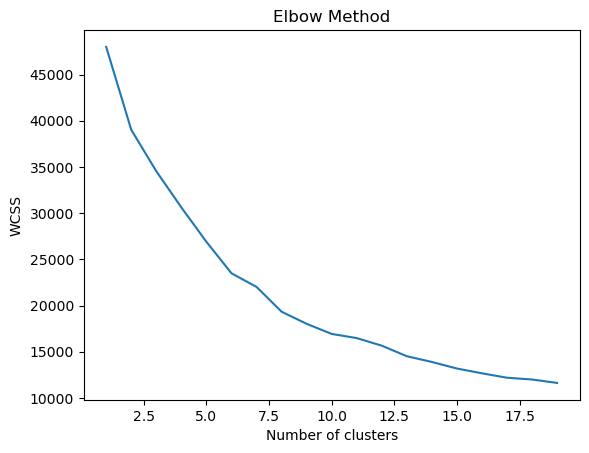

In [13]:
estimating best number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,n_init='auto',random_state=0)
    kmeans.fit(scaled_air)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#running with 6 clusters
clusters_new = KMeans(6, n_init='auto', random_state=1)
clusters_new.fit(scaled_air)

KMeans(n_clusters=6, n_init='auto', random_state=1)

In [35]:
clusters_new.labels_

array([5, 5, 5, ..., 1, 1, 1])

In [36]:
airline['clusterid_new'] = clusters_new.labels_

In [37]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.21776848,  1.12971602,  1.19006991,  0.13835883, -0.09824189,
        -0.06276658,  0.60974661,  1.57305331,  3.46573379,  3.71820164,
         0.24710114,  0.92510643],
       [ 0.96522904, -0.33689018, -0.04547676, -0.4988348 , -0.09824189,
        -0.06276658, -0.46067079, -0.4166957 , -0.19142557, -0.20981662,
        -0.95641986, -0.35053849],
       [-0.40292251,  0.51558278, -0.03080527,  1.36784221, -0.09824189,
        -0.05264302,  1.13226732,  0.80212023, -0.07373722, -0.0784419 ,
         0.40619957,  0.67980213],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  3.17969131,  1.71461374,  0.03329269,  0.05969539,
         0.23987261,  0.33752735],
       [ 0.21932485, -0.04688966, -0.1562356 , -0.66822727,  9.03825361,
        -0.06276658, -0.10166533,  0.61785114,  0.0875494 ,  0.22034681,
        -0.07246398,  0.05178388],
       [-0.79367854, -0.16585026, -0.06934794, -0.51008593, -0.09824189,
        -0.05872674, -

In [38]:
airline.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1762.073171,187434.975610,1064.713415,2.250000,1.000000,1.000000,31868.975610,26.707317,5312.201220,15.475610,4628.792683,0.817073
1,1,3135.046061,39679.789720,108.862483,1.373832,1.000000,1.000000,6025.686916,7.606809,191.925234,0.577437,2144.254339,0.201602
2,2,1545.663699,125601.617211,120.403561,3.943620,1.000000,1.001978,44517.276954,19.306627,357.174085,1.077151,4959.229476,0.698318
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1093.660883,56889.746845,90.469243,1.357256,1.000000,1.000789,5726.893533,7.828864,226.578864,0.695584,5713.920347,0.247634


In [39]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [40]:
centroids = clusters_new.cluster_centers_

In [41]:
ulabel=np.unique(clusters_new.labels_)

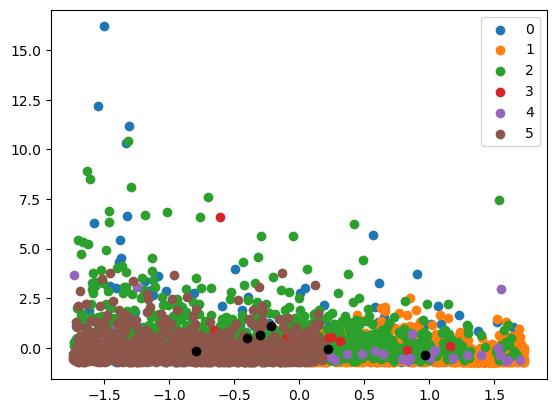

In [42]:
for i in ulabel:
    plt.scatter(scaled_air[clusters_new.labels_ == i , 0] , scaled_air[clusters_new.labels_ == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , color = 'k')
plt.legend()
plt.show()

In [43]:
#Model score
clusters_new.inertia_

23502.62717267626

C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


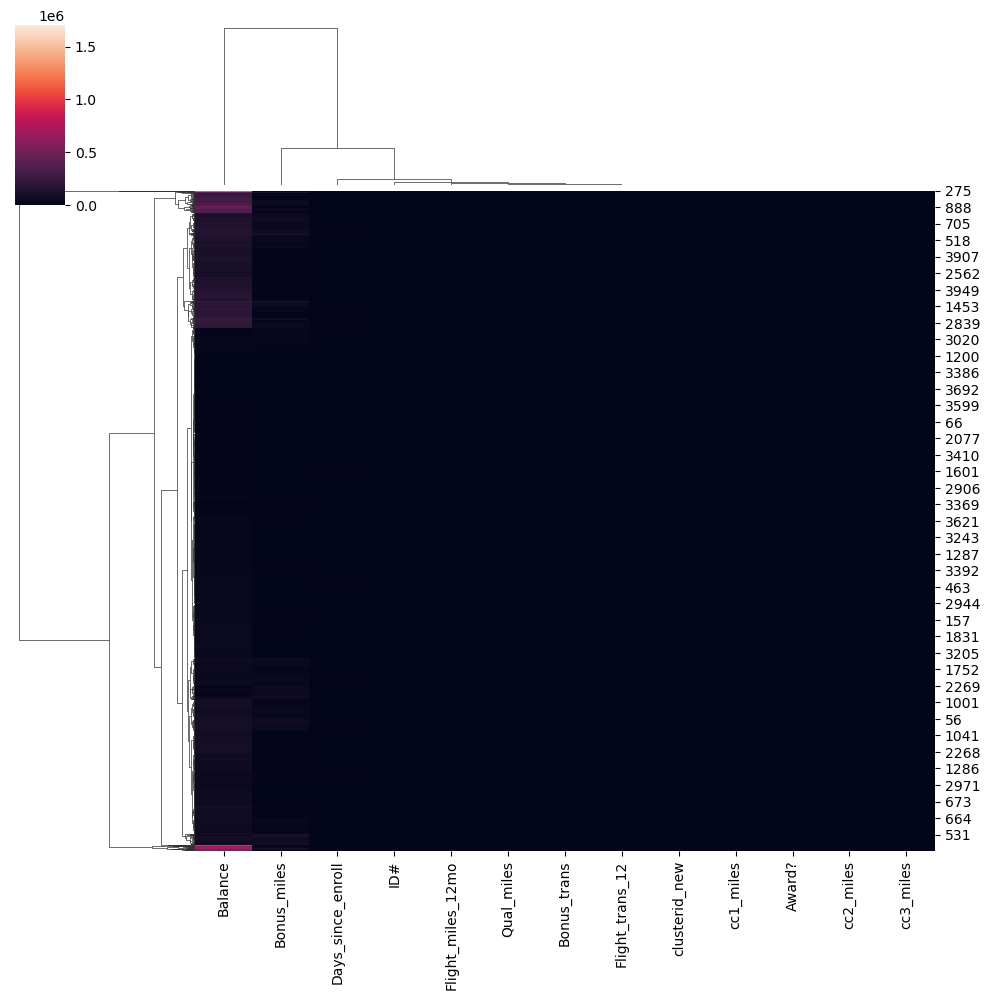

In [44]:
sn.clustermap(airline)

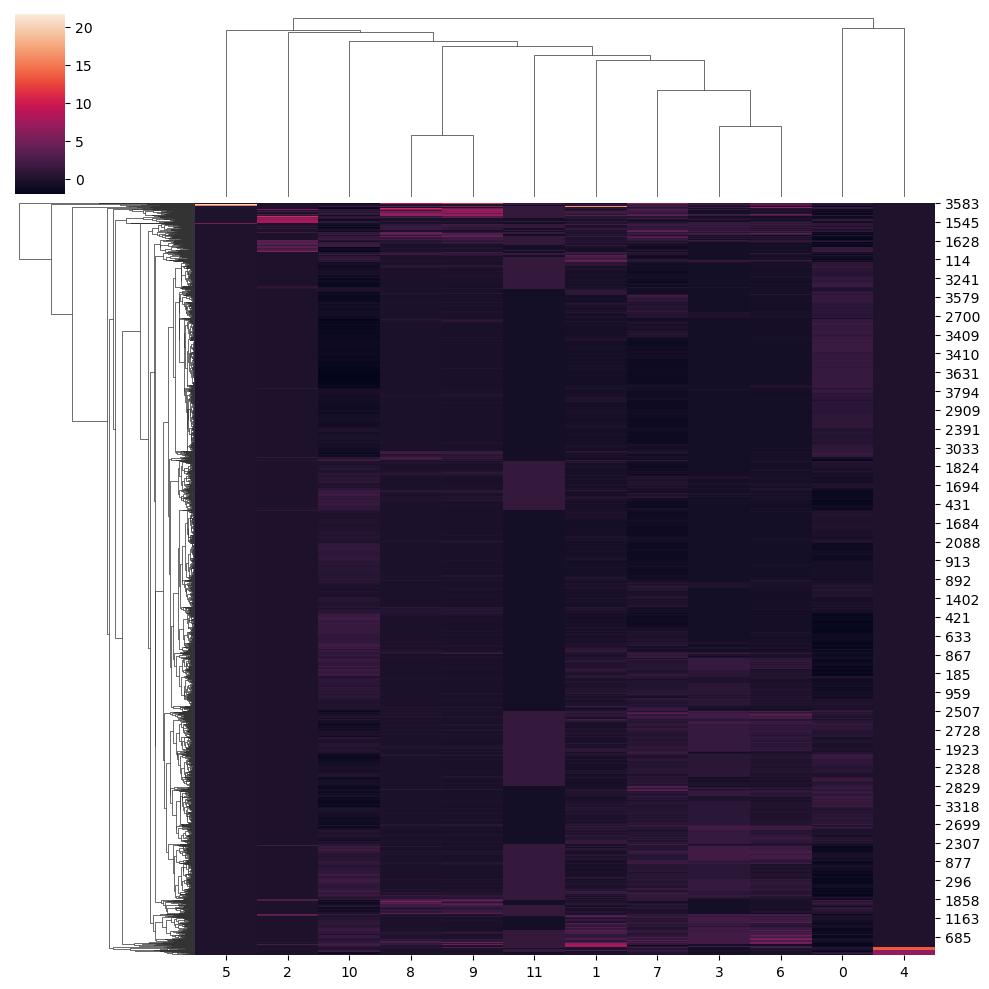

In [45]:
sn.clustermap(scaled_air)

In [ ]:
#scaled data depicts better clustering although  it has no meaning